# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import json
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Image Data Loading

In [2]:
data_path_train = "../data/train"
data_path_valid = "../data/valid"

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_path_train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=42,
    validation_split=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [4]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in train_ds:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[158.   138.   137.  ]
   [161.75 141.75 140.75]
   [161.75 141.75 140.75]
   ...
   [199.5  181.5  181.5 ]
   [195.75 177.75 177.75]
   [182.25 164.25 164.25]]

  [[166.5  146.5  145.5 ]
   [149.   129.   128.  ]
   [154.75 134.75 133.75]
   ...
   [179.75 161.75 161.75]
   [177.25 159.25 159.25]
   [192.5  174.5  174.5 ]]

  [[155.75 135.75 134.75]
   [153.75 133.75 132.75]
   [161.75 141.75 140.75]
   ...
   [181.25 163.25 163.25]
   [192.75 174.75 174.75]
   [187.75 169.75 169.75]]

  ...

  [[106.5   92.5   81.5 ]
   [100.5   86.5   75.5 ]
   [101.    87.    76.  ]
   ...
   [124.   116.75  91.75]
   [126.75 109.5   96.25]
   [131.25 106.75  99.25]]

  [[102.75  90.75  78.75]
   [ 96.5   84.5   72.5 ]
   [ 98.75  86.75  74.75]
   ...
   [ 87.    85.    57.  ]
   [110.25  98.5   83.5 ]
   [150.25 132.25 122.5 ]]

  [[101.75  89.75  77.75]
   [ 91.75  79.75  67.75]
   [ 95.    83.    71.  ]
   ...
   [ 75.5   78.    49.5 ]
   [ 28.5   21.5    7.75]
   [ 46.75  34.25  2

In [6]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    data_path_valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=42,
    validation_split=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [7]:
valid_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in valid_ds:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 15.     6.5    7.  ]
   [ 26.5   15.5   22.  ]
   [ 25.    15.    25.  ]
   ...
   [137.5  127.5  154.5 ]
   [136.75 126.75 153.75]
   [137.5  127.5  154.5 ]]

  [[ 15.     6.75   7.25]
   [ 26.75  17.25  23.75]
   [ 26.5   16.25  27.  ]
   ...
   [138.   128.   155.  ]
   [137.5  127.5  154.5 ]
   [133.25 123.25 150.25]]

  [[ 13.5    7.25   8.  ]
   [ 27.75  18.25  24.75]
   [ 28.75  18.25  30.25]
   ...
   [140.   130.   157.  ]
   [136.75 126.75 153.75]
   [134.25 124.25 151.25]]

  ...

  [[106.25  97.75 109.25]
   [170.25 159.25 173.25]
   [170.5  159.5  173.5 ]
   ...
   [145.25 137.25 161.25]
   [140.5  132.5  156.5 ]
   [139.75 131.75 155.75]]

  [[102.25  92.5  105.25]
   [169.   158.   172.  ]
   [180.5  169.5  183.5 ]
   ...
   [143.75 135.75 159.75]
   [160.5  152.5  176.5 ]
   [138.   130.   154.  ]]

  [[ 92.25  82.25  95.25]
   [159.75 148.75 162.75]
   [198.   188.25 200.25]
   ...
   [145.   137.   161.  ]
   [140.25 132.25 156.25]
   [139.75 131.75 15

# Build the Model

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

C:\Users\ANIKET\anaconda3\envs\deep_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

In [12]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

In [13]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,172,256 (4.47 MB)

 Trainable params: 1,172,256 (4.47 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=400,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │     6,554,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        15,238 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,741,494 (29.53 MB)

 Trainable params: 7,741,494 (29.53 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

# Train the Model

In [18]:
training_history = model.fit(train_ds,validation_data=valid_ds,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3973s 2s/step - accuracy: 0.3162 - loss: 2.5206 - val_accuracy: 0.8024 - val_loss: 0.6261
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3948s 2s/step - accuracy: 0.7860 - loss: 0.6870 - val_accuracy: 0.8861 - val_loss: 0.3525
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3925s 2s/step - accuracy: 0.8543 - loss: 0.4562 - val_accuracy: 0.9124 - val_loss: 0.2658
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4520s 2s/step - accuracy: 0.8793 - loss: 0.3805 - val_accuracy: 0.9235 - val_loss: 0.2385
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4240s 2s/step - accuracy: 0.8864 - loss: 0.3510 - val_accuracy: 0.9111 - val_loss: 0.2709
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3936s 2s/step - accuracy: 0.9027 - loss: 0.3015 - val_accuracy: 0.9225 - val_loss: 0.2349
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4896s 2s/step - accuracy: 0.9013 - loss: 0.3053 - val_accuracy: 0.9349 - val_loss: 0.2065
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4313s 2s/step - accuracy: 0.9074 -

# Save Training History

In [27]:
training_history.history

{'accuracy': [0.5274059176445007,
  0.807425856590271,
  0.8596770763397217,
  0.8822818398475647,
  0.889821469783783,
  0.9009317755699158,
  0.9031367897987366,
  0.9079450964927673,
  0.9091116189956665,
  0.9048865437507629],
 'loss': [1.6475882530212402,
  0.6112228035926819,
  0.4369005262851715,
  0.36901426315307617,
  0.3394318222999573,
  0.30631688237190247,
  0.3032594323158264,
  0.2859267294406891,
  0.2832602262496948,
  0.3041699230670929],
 'val_accuracy': [0.8023560047149658,
  0.8861256837844849,
  0.912417471408844,
  0.9234578013420105,
  0.9111085534095764,
  0.9224902987480164,
  0.9348964095115662,
  0.9321079254150391,
  0.9363760352134705,
  0.9328477382659912],
 'val_loss': [0.6260835528373718,
  0.35247600078582764,
  0.2657706141471863,
  0.23854194581508636,
  0.27089160680770874,
  0.23489579558372498,
  0.20653049647808075,
  0.21613210439682007,
  0.1920001357793808,
  0.20557957887649536]}

In [28]:
with open ("../models/training_hist.json","w") as f:
  json.dump(training_history.history,f)

# Accuracy Visualization

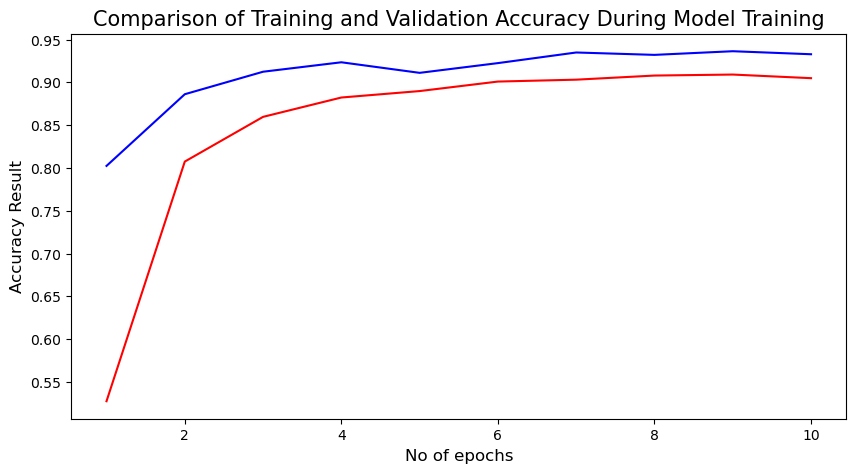

In [38]:
epochs = [i for i in range(1,11)]
plt.figure(figsize=(10,5))
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of epochs",fontsize=12)
plt.ylabel("Accuracy Result",fontsize=12)
plt.title("Comparison of Training and Validation Accuracy During Model Training",fontsize=15)
plt.show()

# Save the Model

In [39]:
model.save("../models/trained_model.keras")

# Saving Class Names

In [40]:
class_names = train_ds.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [41]:
with open("../models/classnames.json","w") as f:
    json.dump(train_ds.class_names,f)